# Programming Project #1: Hybrid Images

## CS445: Computational Photography - Spring 2020

### Part I: Hybrid Images

In [1]:
!pip install opencv-python
!pip install opencv-contrib-python
!pip install pillow
!pip install matplotlib
import cv2

import numpy as np
from matplotlib.colors import LogNorm
from scipy import signal

import utils

In [2]:
%matplotlib notebook
import matplotlib.pyplot as plt

In [3]:
# im1_file = './nutmeg.jpg'
im1_file = './lion.jpg'
im2_file = './dea2.jpg'
# im2_file ='./DerekPicture.jpg'

im1 = cv2.imread(im1_file, cv2.IMREAD_GRAYSCALE)
im2 = cv2.imread(im2_file, cv2.IMREAD_GRAYSCALE)

<IPython.core.display.Javascript object>


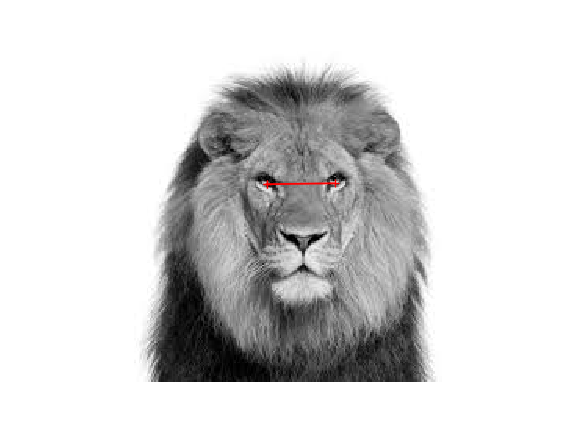

In [4]:
pts_im1 = utils.prompt_eye_selection(im1)

<IPython.core.display.Javascript object>


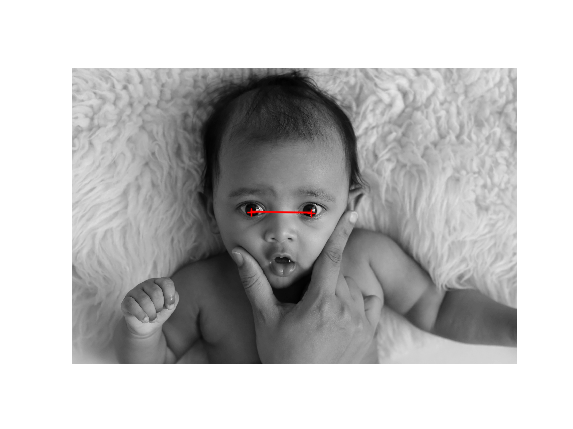

In [5]:
pts_im2 = utils.prompt_eye_selection(im2)

In [6]:
im1, im2 = utils.align_images(im1_file, im2_file,pts_im1,pts_im2,save_images=False)

In [7]:
# convert to grayscale
im1 = cv2.cvtColor(im1, cv2.COLOR_BGR2GRAY) / 255.0
im2 = cv2.cvtColor(im2, cv2.COLOR_BGR2GRAY) / 255.0

<IPython.core.display.Javascript object>


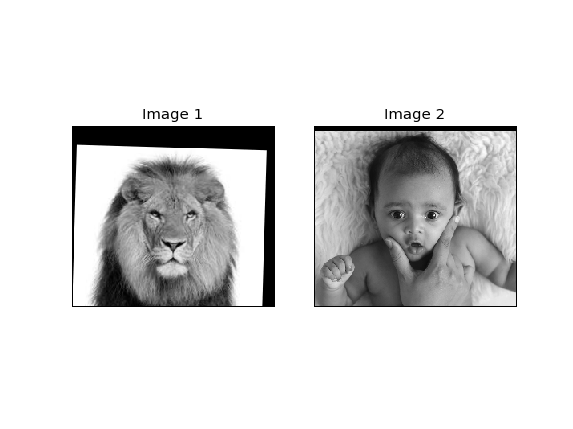

<IPython.core.display.Javascript object>


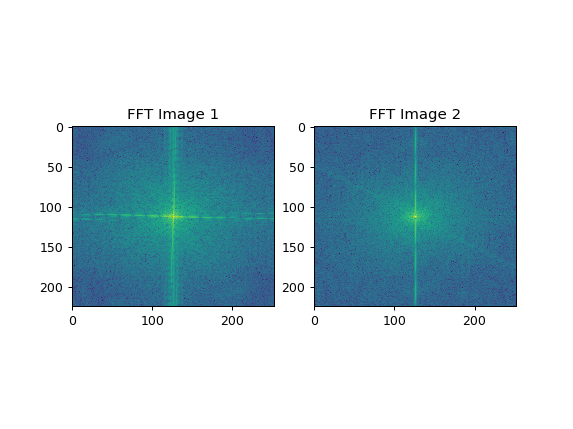

In [8]:
#Images sanity check
fig, axes = plt.subplots(1, 2)
axes[0].imshow(im1,cmap='gray')
axes[0].set_title('Image 1'), axes[0].set_xticks([]), axes[0].set_yticks([])
axes[1].imshow(im2,cmap='gray')
axes[1].set_title('Image 2'), axes[1].set_xticks([]), axes[1].set_yticks([]);

fig, axes = plt.subplots(1,2)
plt.subplot(121)
plt.imshow(np.log(np.abs(np.fft.fftshift(np.fft.fft2(im1)))))
plt.title("FFT Image 1")
plt.show()

plt.subplot(122)
plt.imshow(np.log(np.abs(np.fft.fftshift(np.fft.fft2(im2)))))
plt.title("FFT Image 2")
plt.show()


In [43]:
def hybridImage(im1, im2, cutoff_low, cutoff_high):
    '''
    Inputs:
        im1:    RGB (height x width x 3) or a grayscale (height x width) image
                as a numpy array.
        im2:    RGB (height x width x 3) or a grayscale (height x width) image
                as a numpy array.
        cutoff_low: standard deviation for the low-pass filter
        cutoff_high: standard deviation for the high-pass filter
        
    Output:
        Return the combination of both images, one filtered with a low-pass filter
        and the other with a high-pass filter.
    '''
    low_pass = signal.convolve2d(im2, utils.gaussian_kernel(cutoff_low, 3 * cutoff_low), mode='same', boundary='symm')
    high_pass = im1 - signal.convolve2d(im1, utils.gaussian_kernel(cutoff_high, 3 * cutoff_high), mode='same', boundary='symm')
        
    fig, axes = plt.subplots(1, 2)
    axes[0].imshow(low_pass,cmap='gray')
    axes[0].set_title('Low Pass'), axes[0].set_xticks([]), axes[0].set_yticks([])
    axes[1].imshow(high_pass,cmap='gray')
    axes[1].set_title('High Pass'), axes[1].set_xticks([]), axes[1].set_yticks([]);

    fig, axes = plt.subplots(1,2)
    plt.subplot(121)
    plt.imshow(np.log(np.abs(np.fft.fftshift(np.fft.fft2(low_pass)))))
    plt.title("FFT Low Pass")
    plt.show()

    plt.subplot(122)
    plt.imshow(np.log(np.abs(np.fft.fftshift(np.fft.fft2(high_pass)))))
    plt.title("FFT High Pass")
    plt.show()

    return high_pass + low_pass

mean1  [[0.57591759]]
std1  [[0.36780656]]
mean2  [[0.46905672]]
std2  [[0.20415156]]


<IPython.core.display.Javascript object>


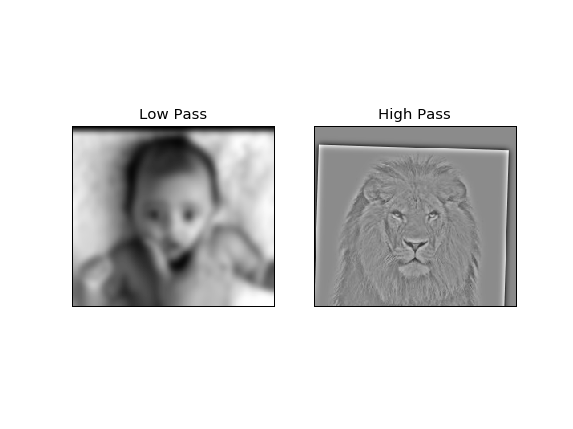

<IPython.core.display.Javascript object>


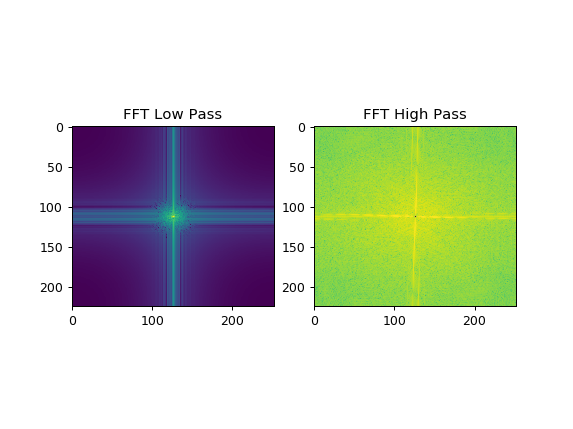

In [44]:
arbitrary_value = 20  # you should choose meaningful values; you might want to set to a fraction of image size

mean1, std1 = cv2.meanStdDev(im1)
print("mean1 ", mean1)
print("std1 ", std1)

mean2, std2 = cv2.meanStdDev(im2)
print("mean2 ", mean2)
print("std2 ", std2)

cutoff_low = 1/std1
cutoff_high = 1/std2

cutoff_low = 4
cutoff_high = 4
im_hybrid = hybridImage(im1, im2, cutoff_low, cutoff_high)

<IPython.core.display.Javascript object>


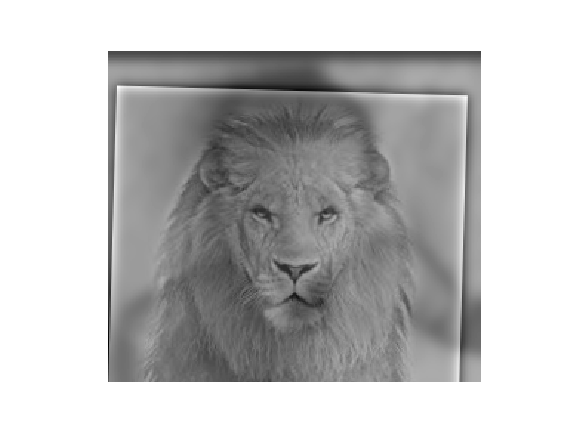

In [108]:
# Optional: Select top left corner and bottom right corner to crop image
# the function returns dictionary of 
# {
#   'cropped_image': np.ndarray of shape H x W
#   'crop_bound': np.ndarray of shape 2x2
# }
cropped_object = utils.interactive_crop(im_hybrid)

<IPython.core.display.Javascript object>


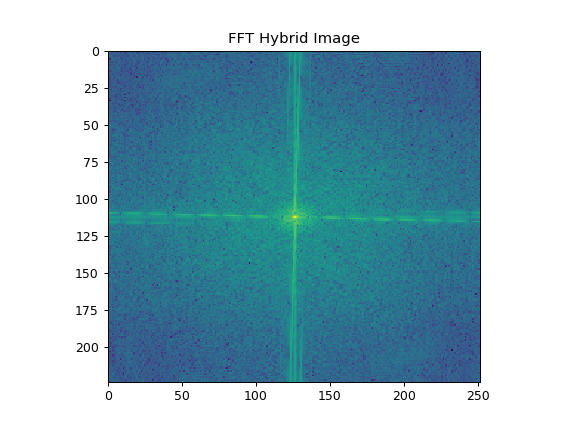

In [35]:
fig, axes = plt.subplots(1,1)
# plt.subplot(121)
plt.imshow(np.log(np.abs(np.fft.fftshift(np.fft.fft2(im_hybrid)))))
plt.title("FFT Hybrid Image")
plt.show()


### Part II: Image Enhancement

##### Two out of three types of image enhancement are required.  Choose a good image to showcase each type and implement a method.  This code doesn't rely on the hybrid image part.

#### Contrast enhancement

<IPython.core.display.Javascript object>


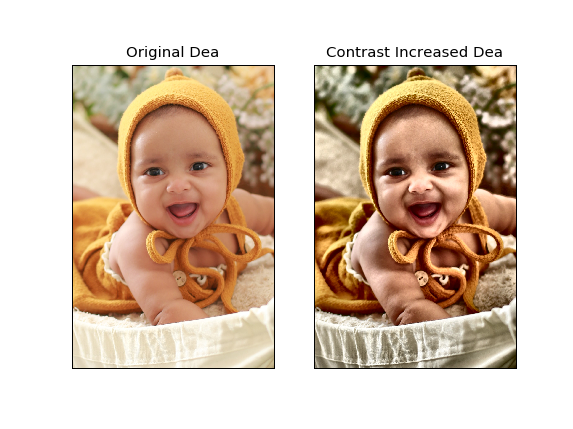

(Text(0.5, 1.0, 'Contrast Increased Dea'), [], [])

In [105]:
import cv2

img = cv2.imread("./dea1.jpg")
fig, axes = plt.subplots(1,2)
axes[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
axes[0].set_title("Original Dea"), axes[0].set_xticks([]), axes[0].set_yticks([])

# hist = cv2.equalizeHist(img)
clahe = cv2.createCLAHE(clipLimit = 4, tileGridSize = (8, 8))
lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
l, a, b = cv2.split(lab)
lab = cv2.merge((clahe.apply(l), a, b))
img2 = cv2.cvtColor(lab, cv2.COLOR_LAB2BGR)
axes[1].imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
axes[1].set_title("Contrast Increased Dea"), axes[1].set_xticks([]), axes[1].set_yticks([])


#### Color enhancement 

<IPython.core.display.Javascript object>


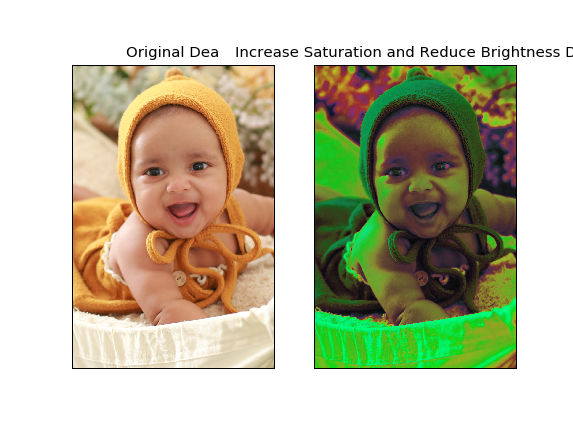

In [107]:
import cv2

img = cv2.imread("./dea1.jpg")

hsvImg = cv2.cvtColor(img, cv2.COLOR_BGR2HSV).astype(np.float32)
h, s, v = cv2.split(hsvImg)

# Increase saturation and decrease brightness
temp = cv2.merge((h, s * 1.4, v * 0.6))
temp = np.clip(hsv, 0, 255)
temp = cv2.cvtColor(temp.astype(np.uint8), cv2.COLOR_HSV2RGB) 

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
fig, axes = plt.subplots(1, 2)
axes[0].imshow(img)
axes[0].set_title('Original Dea'), axes[0].set_xticks([]), axes[0].set_yticks([])
axes[1].imshow(temp)
axes[1].set_title('Increase Saturation and Reduce Brightness Dea'), axes[1].set_xticks([]), axes[1].set_yticks([]);

#### Color shift

<IPython.core.display.Javascript object>


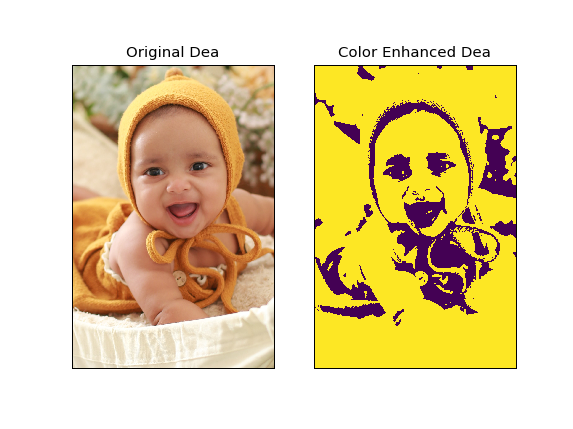

(Text(0.5, 1.0, 'Color Enhanced Dea'), [], [])

In [83]:
import cv2

img = cv2.imread("./dea1.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret , threshold_image = cv2.threshold(gray, 127, 255, 0)

fig, axes = plt.subplots(1,2)
axes[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
axes[0].set_title("Original Dea"), axes[0].set_xticks([]), axes[0].set_yticks([])

axes[1].imshow(threshold_image)
axes[1].set_title("Color Enhanced Dea"), axes[1].set_xticks([]), axes[1].set_yticks([])